In [4]:
# temp = []
# for file in os.listdir('.'):
#     if file.endswith('.txt'):
#         with open(file, encoding='big5', errors='replace') as f:
#             data = f.readlines()            
#         temp.append(data)

In [5]:
# data = [item.split(',') for sublist in temp for item in sublist]

In [27]:
# df = pd.DataFrame(data[1:], columns=data[0])

In [74]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [72]:
index_df = pd.read_csv('data_dictionary.csv')
index_df

,Column names,Descriptions,Type
0,Store ID,Identifier for the store that the transaction ...,Categorical
1,Store Type,The store's neighborhood description,Categorical
2,Trans ID,"Transaction ID, identify each transactions",Categorical
3,Date,Date of the transaction,Datetime
4,Time,Time of the transaction,Datetime
5,Member ID,Identifier of the member who made the transact...,Categorical
6,Member Grade,The membership grade of the member,Ordinal
7,Gender,NaN,Categorical
8,Member Birthday,NaN,Datetime
9,Prod Name (Chi),Name of the merchandise in Chinese,Categorical


In [23]:
raw = pd.read_csv('transactions.csv')

In [26]:
raw.shape

(2759843, 16)

In [33]:
cleaned_df = raw.replace('', np.nan, regex=True)
cleaned_df['Cat'] = cleaned_df['Cat'].apply(lambda x: str(x).strip())
cleaned_df['Amount'] = cleaned_df['Amount'].apply(lambda x: float(x))
cleaned_df['hour'] = cleaned_df['Time'].apply(lambda x: x.split(':')[0])

# Some data samples

In [76]:
cleaned_df.count()
cleaned_df.sample(10)

,Store ID,Store Type,Trans ID,Date,Time,Member ID,Member Grade,Gender,Member Birthday,Prod Name (Chi),Dept,Cat,Subcat,Sold Qty,MOP,Amount,hour
1870667,63769,TPC - TRANSPORT PT COMMERCIAL,8179041683,2018-04-20,22:17:12,NaN,NaN,NaN,NaN,超軟治清貨$10,NaN,nan,NaN,1,Octopus,-4.0,22
284805,630,HPR - PRIVATE HOUSING,7249326631,2018-04-20,18:14:25,8178113.0,G,F,2003-06-08,麥提莎牛奶朱古力盒60克,Confectionery & Snack,Chocolate,Bite Size,1,Octopus,16.9,18
1038644,81180,HPU - PUBLIC HOUSING,7224526738,2018-04-24,07:37:58,NaN,NaN,NaN,NaN,嘉頓檸檬雪芳蛋糕,Grocery,Packaged Bakery,Cakes,1,Octopus,6.8,07
2031652,63169,HPR - PRIVATE HOUSING,7242250196,2018-04-15,11:42:47,NaN,NaN,NaN,NaN,星島$2購報優惠卡9913140014237,A & P Expense,Vendor Coupon,SING TAO $2 COUPON,1,Octopus,-2.0,11
2599837,45848,HPR - PRIVATE HOUSING,7254678213,2018-04-10,21:49:41,NaN,NaN,NaN,NaN,ITUNES HK$500,Convenience Services,Gift Card,ITUNES CARD,1,現金,500.0,21
2607073,45848,HPR - PRIVATE HOUSING,7254644152,2018-04-12,15:41:43,18911181.0,S,M,2003-07-02,爽浪無糖香口珠20粒袋庄,Confectionery & Snack,Gum,Bag,1,Octopus,10.5,15
1173415,72672,HPR - PRIVATE HOUSING,7262114957,2018-04-17,05:26:27,63843864.0,G,M,2002-11-21,東方日報每份,Publications,Newspaper,Newspaper (General),1,Octopus,8.0,05
1154048,72672,HPR - PRIVATE HOUSING,7262205442,2018-04-09,08:25:30,NaN,NaN,NaN,NaN,$200八達通增值,Convenience Services,Octopus,Octopus (General),1,現金,200.0,08
1637392,72170,HSR - HIGH STREET RESIDENTIAL,7247246239,2018-04-04,16:26:54,9468418.0,G,F,NaN,QB+維他$13 P1,NaN,nan,NaN,1,Octopus,-3.2,16
2465288,54358,HPR - PRIVATE HOUSING,8163629808,2018-04-29,07:22:54,NaN,NaN,NaN,NaN,VIP 報紙 - $1.0,Publications,Promotion Coupon,Promotion Coupon (General),1,Octopus,-1.0,07


# Store type

In [39]:
cleaned_df['Store Type'].value_counts()

HPU - PUBLIC HOUSING              835180
HSR - HIGH STREET RESIDENTIAL     568627
HPR - PRIVATE HOUSING             542952
TPR - TRANSPORT PT RESIDENTIAL    248310
HSC - HIGH STREET COMMERCIAL      242702
HSET -HS ENTERTAINMENT/TOURIST    189443
TPC - TRANSPORT PT COMMERCIAL     132629
Name: Store Type, dtype: int64

# Deparment type

In [53]:
cleaned_df['Dept'].value_counts()

Publications             513821
Convenience Services     494928
Packaged Beverage        483913
Tobacco                  213731
Confectionery & Snack    187203
Dairy                    138665
Beer & Mixed Drinks      103774
Packaged Ice Cream        90611
Grocery                   78994
Food Service              70674
HOT & IN                  53577
A & P Expense             51292
Non-Food                  41278
Full-baked Ambient        38031
Deposit                    7596
Wine & Spirit              3268
Catering Item              1721
Instore Bakery              749
Store Use Items             221
Gift Tin                     80
Name: Dept, dtype: int64

In [80]:
cleaned_df[cleaned_df['Dept'] == 'Grocery']['Cat'].value_counts()

Packaged Bakery    76017
Pack Noodle          824
Coupon               642
Cereal               499
Beverage             394
Condiment            268
Misc                 235
Canned Food          115
Name: Cat, dtype: int64

# Category type

In [61]:
not_needed = cleaned_df['Cat'].isin(['Octopus', 'Newspaper', 'Cigarette'])
filtered_df = cleaned_df[~not_needed]
category_list = filtered_df['Cat'].value_counts().index.tolist()

In [82]:
# category_list
counter_dic = {}
for cat in category_list:
    counter_dic[cat] = []

In [ ]:
len(filtered_df['Cat'])

In [ ]:
[counter_dic[filtered_df.iloc[i]['Cat']].append(str(filtered_df.iloc[i]['Subcat']).strip()) for i in tqdm(range(len(cleaned_df)))]



  0%|          | 0/2759843 [00:00<?, ?it/s]

  0%|          | 217/2759843 [00:00<21:22, 2150.93it/s]

  0%|          | 439/2759843 [00:00<21:04, 2182.04it/s]

  0%|          | 704/2759843 [00:00<19:42, 2334.05it/s]

  0%|          | 964/2759843 [00:00<19:09, 2400.80it/s]

  0%|          | 1244/2759843 [00:00<18:32, 2479.26it/s]

  0%|          | 1506/2759843 [00:00<18:22, 2501.77it/s]

  0%|          | 1754/2759843 [00:00<18:24, 2498.25it/s]

  0%|          | 2023/2759843 [00:00<18:13, 2521.46it/s]

  0%|          | 2269/2759843 [00:00<18:16, 2514.11it/s]

  0%|          | 2538/2759843 [00:01<18:09, 2531.11it/s]

  0%|          | 2800/2759843 [00:01<18:06, 2538.71it/s]

  0%|          | 3055/2759843 [00:01<18:20, 2506.07it/s]

  0%|          | 3302/2759843 [00:01<18:21, 2503.28it/s]

  0%|          | 3548/2759843 [00:01<18:25, 2492.50it/s]

  0%|          | 3819/2759843 [00:01<18:19, 2506.68it/s]

  0%|          | 4078/2759843 [00:01<18:17, 2511.30it/s]

  0%|          | 4340/2759843

  1%|          | 33647/2759843 [00:12<17:16, 2629.61it/s]

  1%|          | 33914/2759843 [00:12<17:17, 2628.46it/s]

  1%|          | 34187/2759843 [00:13<17:16, 2629.10it/s]

  1%|          | 34452/2759843 [00:13<17:16, 2629.33it/s]

  1%|▏         | 34722/2759843 [00:13<17:16, 2629.77it/s]

  1%|▏         | 34998/2759843 [00:13<17:15, 2630.71it/s]

  1%|▏         | 35273/2759843 [00:13<17:15, 2631.58it/s]

  1%|▏         | 35550/2759843 [00:13<17:14, 2632.54it/s]

  1%|▏         | 35823/2759843 [00:13<17:14, 2632.45it/s]

  1%|▏         | 36093/2759843 [00:13<17:15, 2631.25it/s]

  1%|▏         | 36374/2759843 [00:13<17:14, 2632.40it/s]

  1%|▏         | 36642/2759843 [00:13<17:14, 2631.17it/s]

  1%|▏         | 36904/2759843 [00:14<17:15, 2630.35it/s]

  1%|▏         | 37174/2759843 [00:14<17:14, 2630.79it/s]

  1%|▏         | 37453/2759843 [00:14<17:14, 2631.95it/s]

  1%|▏         | 37725/2759843 [00:14<17:14, 2632.51it/s]

  1%|▏         | 37996/2759843 [00:14<17:13, 2633.08it/s

  2%|▏         | 68203/2759843 [00:25<16:50, 2663.27it/s]

  2%|▏         | 68480/2759843 [00:25<16:50, 2663.57it/s]

  2%|▏         | 68763/2759843 [00:25<16:50, 2664.19it/s]

  3%|▎         | 69041/2759843 [00:25<16:49, 2664.37it/s]

  3%|▎         | 69317/2759843 [00:26<16:49, 2664.41it/s]

  3%|▎         | 69591/2759843 [00:26<16:49, 2664.27it/s]

  3%|▎         | 69867/2759843 [00:26<16:49, 2664.64it/s]

  3%|▎         | 70139/2759843 [00:26<16:49, 2664.68it/s]

  3%|▎         | 70410/2759843 [00:26<16:49, 2664.83it/s]

  3%|▎         | 70681/2759843 [00:26<16:49, 2664.89it/s]

  3%|▎         | 70957/2759843 [00:26<16:48, 2665.22it/s]

  3%|▎         | 71239/2759843 [00:26<16:48, 2665.82it/s]

  3%|▎         | 71514/2759843 [00:26<16:48, 2665.92it/s]

  3%|▎         | 71787/2759843 [00:26<16:48, 2665.96it/s]

  3%|▎         | 72059/2759843 [00:27<16:48, 2666.06it/s]

  3%|▎         | 72330/2759843 [00:27<16:48, 2666.03it/s]

  3%|▎         | 72600/2759843 [00:27<16:48, 2665.87it/s

  4%|▎         | 102845/2759843 [00:38<16:28, 2687.39it/s]

  4%|▎         | 103113/2759843 [00:38<16:28, 2687.16it/s]

  4%|▎         | 103392/2759843 [00:38<16:28, 2687.41it/s]

  4%|▍         | 103664/2759843 [00:38<16:28, 2687.50it/s]

  4%|▍         | 103951/2759843 [00:38<16:28, 2687.95it/s]

  4%|▍         | 104228/2759843 [00:38<16:27, 2688.15it/s]

  4%|▍         | 104504/2759843 [00:38<16:27, 2688.32it/s]

  4%|▍         | 104780/2759843 [00:39<16:28, 2685.84it/s]

  4%|▍         | 105033/2759843 [00:39<16:30, 2681.20it/s]

  4%|▍         | 105257/2759843 [00:39<16:31, 2678.17it/s]

  4%|▍         | 105467/2759843 [00:39<16:32, 2675.48it/s]

  4%|▍         | 105705/2759843 [00:39<16:32, 2674.69it/s]

  4%|▍         | 105932/2759843 [00:39<16:32, 2673.66it/s]

  4%|▍         | 106164/2759843 [00:39<16:32, 2672.75it/s]

  4%|▍         | 106389/2759843 [00:39<16:33, 2671.57it/s]

  4%|▍         | 106611/2759843 [00:39<16:33, 2669.27it/s]

  4%|▍         | 106837/2759843 [00:40<1

  5%|▍         | 136552/2759843 [00:51<16:22, 2669.14it/s]

  5%|▍         | 136823/2759843 [00:51<16:22, 2669.21it/s]

  5%|▍         | 137103/2759843 [00:51<16:22, 2669.44it/s]

  5%|▍         | 137376/2759843 [00:51<16:22, 2669.55it/s]

  5%|▍         | 137651/2759843 [00:51<16:22, 2669.71it/s]

  5%|▍         | 137930/2759843 [00:51<16:22, 2669.93it/s]

  5%|▌         | 138208/2759843 [00:51<16:21, 2670.12it/s]

  5%|▌         | 138501/2759843 [00:51<16:21, 2670.60it/s]

  5%|▌         | 138784/2759843 [00:51<16:21, 2670.92it/s]

  5%|▌         | 139065/2759843 [00:52<16:21, 2671.08it/s]

  5%|▌         | 139345/2759843 [00:52<16:21, 2671.17it/s]

  5%|▌         | 139623/2759843 [00:52<16:20, 2671.35it/s]

  5%|▌         | 139903/2759843 [00:52<16:20, 2671.60it/s]

  5%|▌         | 140187/2759843 [00:52<16:20, 2671.92it/s]

  5%|▌         | 140489/2759843 [00:52<16:20, 2672.57it/s]

  5%|▌         | 140793/2759843 [00:52<16:19, 2673.26it/s]

  5%|▌         | 141085/2759843 [00:52<1

  6%|▌         | 171531/2759843 [01:03<16:02, 2688.56it/s]

  6%|▌         | 171818/2759843 [01:03<16:02, 2688.84it/s]

  6%|▌         | 172097/2759843 [01:04<16:02, 2688.97it/s]

  6%|▌         | 172376/2759843 [01:04<16:02, 2688.61it/s]

  6%|▋         | 172646/2759843 [01:04<16:02, 2688.56it/s]

  6%|▋         | 172939/2759843 [01:04<16:02, 2688.92it/s]

  6%|▋         | 173215/2759843 [01:04<16:01, 2688.93it/s]

  6%|▋         | 173489/2759843 [01:04<16:01, 2688.76it/s]

  6%|▋         | 173759/2759843 [01:04<16:01, 2688.56it/s]

  6%|▋         | 174033/2759843 [01:04<16:01, 2688.63it/s]

  6%|▋         | 174322/2759843 [01:04<16:01, 2688.94it/s]

  6%|▋         | 174597/2759843 [01:04<16:01, 2688.99it/s]

  6%|▋         | 174871/2759843 [01:05<16:01, 2688.99it/s]

  6%|▋         | 175148/2759843 [01:05<16:01, 2689.10it/s]

  6%|▋         | 175443/2759843 [01:05<16:00, 2689.50it/s]

  6%|▋         | 175727/2759843 [01:05<16:00, 2689.72it/s]

  6%|▋         | 176017/2759843 [01:05<1

  7%|▋         | 205668/2759843 [01:16<15:51, 2683.89it/s]

  7%|▋         | 205942/2759843 [01:16<15:51, 2683.97it/s]

  7%|▋         | 206221/2759843 [01:16<15:51, 2684.09it/s]

  7%|▋         | 206495/2759843 [01:16<15:51, 2684.12it/s]

  7%|▋         | 206768/2759843 [01:17<15:51, 2684.10it/s]

  8%|▊         | 207059/2759843 [01:17<15:50, 2684.38it/s]

  8%|▊         | 207347/2759843 [01:17<15:50, 2684.62it/s]

  8%|▊         | 207637/2759843 [01:17<15:50, 2684.90it/s]

  8%|▊         | 207933/2759843 [01:17<15:50, 2685.26it/s]

  8%|▊         | 208220/2759843 [01:17<15:50, 2685.49it/s]

  8%|▊         | 208507/2759843 [01:17<15:49, 2685.64it/s]

  8%|▊         | 208796/2759843 [01:17<15:49, 2685.89it/s]

  8%|▊         | 209083/2759843 [01:17<15:49, 2686.13it/s]

  8%|▊         | 209370/2759843 [01:17<15:49, 2686.27it/s]

  8%|▊         | 209655/2759843 [01:18<15:49, 2686.44it/s]

  8%|▊         | 209950/2759843 [01:18<15:49, 2686.79it/s]

  8%|▊         | 210245/2759843 [01:18<1

  9%|▊         | 236750/2759843 [01:29<15:56, 2637.46it/s]

  9%|▊         | 236995/2759843 [01:29<15:56, 2636.75it/s]

  9%|▊         | 237272/2759843 [01:29<15:56, 2636.89it/s]

  9%|▊         | 237568/2759843 [01:30<15:56, 2637.24it/s]

  9%|▊         | 237846/2759843 [01:30<15:56, 2637.40it/s]

  9%|▊         | 238120/2759843 [01:30<15:56, 2637.51it/s]

  9%|▊         | 238397/2759843 [01:30<15:55, 2637.64it/s]

  9%|▊         | 238668/2759843 [01:30<15:55, 2637.68it/s]

  9%|▊         | 238938/2759843 [01:30<15:55, 2637.74it/s]

  9%|▊         | 239209/2759843 [01:30<15:55, 2637.81it/s]

  9%|▊         | 239479/2759843 [01:30<15:55, 2637.88it/s]

  9%|▊         | 239760/2759843 [01:30<15:55, 2638.06it/s]

  9%|▊         | 240037/2759843 [01:30<15:55, 2638.20it/s]

  9%|▊         | 240312/2759843 [01:31<15:55, 2637.78it/s]

  9%|▊         | 240576/2759843 [01:31<15:55, 2637.80it/s]

  9%|▊         | 240839/2759843 [01:31<15:55, 2637.63it/s]

  9%|▊         | 241098/2759843 [01:31<1

 10%|▉         | 270475/2759843 [01:42<15:43, 2637.88it/s]

 10%|▉         | 270721/2759843 [01:42<15:43, 2637.54it/s]

 10%|▉         | 270972/2759843 [01:42<15:43, 2637.41it/s]

 10%|▉         | 271228/2759843 [01:42<15:43, 2637.32it/s]

 10%|▉         | 271476/2759843 [01:42<15:43, 2637.07it/s]

 10%|▉         | 271731/2759843 [01:43<15:43, 2636.98it/s]

 10%|▉         | 271998/2759843 [01:43<15:43, 2637.01it/s]

 10%|▉         | 272255/2759843 [01:43<15:43, 2636.94it/s]

 10%|▉         | 272517/2759843 [01:43<15:43, 2636.92it/s]

 10%|▉         | 272785/2759843 [01:43<15:43, 2636.96it/s]

 10%|▉         | 273063/2759843 [01:43<15:42, 2637.10it/s]

 10%|▉         | 273350/2759843 [01:43<15:42, 2637.32it/s]

 10%|▉         | 273634/2759843 [01:43<15:42, 2637.51it/s]

 10%|▉         | 273918/2759843 [01:43<15:42, 2637.70it/s]

 10%|▉         | 274196/2759843 [01:43<15:42, 2637.79it/s]

 10%|▉         | 274474/2759843 [01:44<15:42, 2637.92it/s]

 10%|▉         | 274751/2759843 [01:44<1

 11%|█         | 304603/2759843 [01:55<15:28, 2643.66it/s]

 11%|█         | 304896/2759843 [01:55<15:28, 2643.91it/s]

 11%|█         | 305188/2759843 [01:55<15:28, 2644.13it/s]

 11%|█         | 305482/2759843 [01:55<15:28, 2644.38it/s]

 11%|█         | 305778/2759843 [01:55<15:27, 2644.65it/s]

 11%|█         | 306071/2759843 [01:55<15:27, 2644.75it/s]

 11%|█         | 306363/2759843 [01:55<15:27, 2644.98it/s]

 11%|█         | 306653/2759843 [01:55<15:27, 2645.20it/s]

 11%|█         | 306942/2759843 [01:56<15:27, 2645.41it/s]

 11%|█         | 307236/2759843 [01:56<15:27, 2645.66it/s]

 11%|█         | 307527/2759843 [01:56<15:26, 2645.88it/s]

 11%|█         | 307818/2759843 [01:56<15:26, 2646.03it/s]

 11%|█         | 308107/2759843 [01:56<15:26, 2646.23it/s]

 11%|█         | 308396/2759843 [01:56<15:26, 2646.40it/s]

 11%|█         | 308683/2759843 [01:56<15:26, 2646.55it/s]

 11%|█         | 308973/2759843 [01:56<15:25, 2646.75it/s]

 11%|█         | 309260/2759843 [01:56<1

 12%|█▏        | 340014/2759843 [02:07<15:10, 2657.56it/s]

 12%|█▏        | 340293/2759843 [02:08<15:10, 2657.66it/s]

 12%|█▏        | 340576/2759843 [02:08<15:10, 2657.80it/s]

 12%|█▏        | 340868/2759843 [02:08<15:10, 2657.99it/s]

 12%|█▏        | 341155/2759843 [02:08<15:09, 2658.15it/s]

 12%|█▏        | 341439/2759843 [02:08<15:09, 2658.29it/s]

 12%|█▏        | 341723/2759843 [02:08<15:10, 2656.32it/s]

 12%|█▏        | 341964/2759843 [02:08<15:10, 2656.05it/s]

 12%|█▏        | 342203/2759843 [02:08<15:10, 2655.75it/s]

 12%|█▏        | 342440/2759843 [02:08<15:10, 2655.20it/s]

 12%|█▏        | 342666/2759843 [02:09<15:10, 2654.32it/s]

 12%|█▏        | 342877/2759843 [02:09<15:10, 2653.81it/s]

 12%|█▏        | 343103/2759843 [02:09<15:10, 2653.49it/s]

 12%|█▏        | 343317/2759843 [02:09<15:11, 2651.50it/s]

 12%|█▏        | 343503/2759843 [02:09<15:11, 2650.87it/s]

 12%|█▏        | 343700/2759843 [02:09<15:11, 2650.34it/s]

 12%|█▏        | 343895/2759843 [02:09<1

 14%|█▎        | 373289/2759843 [02:20<14:59, 2653.33it/s]

 14%|█▎        | 373566/2759843 [02:20<14:59, 2653.41it/s]

 14%|█▎        | 373848/2759843 [02:20<14:59, 2653.53it/s]

 14%|█▎        | 374134/2759843 [02:20<14:59, 2653.67it/s]

 14%|█▎        | 374419/2759843 [02:21<14:58, 2653.81it/s]

 14%|█▎        | 374702/2759843 [02:21<14:58, 2653.93it/s]

 14%|█▎        | 374988/2759843 [02:21<14:58, 2654.08it/s]

 14%|█▎        | 375271/2759843 [02:21<14:58, 2654.12it/s]

 14%|█▎        | 375553/2759843 [02:21<14:58, 2654.23it/s]

 14%|█▎        | 375841/2759843 [02:21<14:58, 2654.39it/s]

 14%|█▎        | 376124/2759843 [02:21<14:57, 2654.48it/s]

 14%|█▎        | 376412/2759843 [02:21<14:57, 2654.64it/s]

 14%|█▎        | 376696/2759843 [02:21<14:57, 2654.70it/s]

 14%|█▎        | 376979/2759843 [02:21<14:57, 2654.82it/s]

 14%|█▎        | 377263/2759843 [02:22<14:57, 2654.95it/s]

 14%|█▎        | 377545/2759843 [02:22<14:57, 2654.93it/s]

 14%|█▎        | 377824/2759843 [02:22<1

 15%|█▍        | 407103/2759843 [02:33<14:46, 2655.14it/s]

 15%|█▍        | 407369/2759843 [02:33<14:46, 2655.14it/s]

 15%|█▍        | 407641/2759843 [02:33<14:45, 2655.19it/s]

 15%|█▍        | 407921/2759843 [02:33<14:45, 2655.28it/s]

 15%|█▍        | 408193/2759843 [02:33<14:45, 2655.32it/s]

 15%|█▍        | 408470/2759843 [02:33<14:45, 2655.39it/s]

 15%|█▍        | 408743/2759843 [02:33<14:45, 2655.37it/s]

 15%|█▍        | 409014/2759843 [02:34<14:45, 2654.64it/s]

 15%|█▍        | 409260/2759843 [02:34<14:46, 2652.18it/s]

 15%|█▍        | 409463/2759843 [02:34<14:46, 2650.86it/s]

 15%|█▍        | 409688/2759843 [02:34<14:46, 2650.61it/s]

 15%|█▍        | 409952/2759843 [02:34<14:46, 2650.60it/s]

 15%|█▍        | 410172/2759843 [02:34<14:46, 2650.29it/s]

 15%|█▍        | 410389/2759843 [02:34<14:46, 2649.18it/s]

 15%|█▍        | 410585/2759843 [02:35<14:47, 2648.47it/s]

 15%|█▍        | 410774/2759843 [02:35<14:47, 2647.61it/s]

 15%|█▍        | 410996/2759843 [02:35<1

 16%|█▌        | 437210/2759843 [02:46<14:44, 2625.90it/s]

 16%|█▌        | 437424/2759843 [02:46<14:44, 2625.57it/s]

 16%|█▌        | 437668/2759843 [02:46<14:44, 2625.45it/s]

 16%|█▌        | 437890/2759843 [02:46<14:44, 2625.01it/s]

 16%|█▌        | 438126/2759843 [02:46<14:44, 2624.85it/s]

 16%|█▌        | 438375/2759843 [02:47<14:44, 2624.76it/s]

 16%|█▌        | 438619/2759843 [02:47<14:44, 2624.65it/s]

 16%|█▌        | 438853/2759843 [02:47<14:44, 2624.38it/s]

 16%|█▌        | 439087/2759843 [02:47<14:44, 2624.22it/s]

 16%|█▌        | 439318/2759843 [02:47<14:44, 2623.94it/s]

 16%|█▌        | 439546/2759843 [02:47<14:44, 2623.56it/s]

 16%|█▌        | 439797/2759843 [02:47<14:44, 2623.48it/s]

 16%|█▌        | 440027/2759843 [02:47<14:44, 2623.25it/s]

 16%|█▌        | 440255/2759843 [02:47<14:44, 2622.51it/s]

 16%|█▌        | 440466/2759843 [02:47<14:44, 2622.12it/s]

 16%|█▌        | 440713/2759843 [02:48<14:44, 2622.03it/s]

 16%|█▌        | 440977/2759843 [02:48<1

 17%|█▋        | 469284/2759843 [02:59<14:34, 2619.39it/s]

 17%|█▋        | 469545/2759843 [02:59<14:34, 2619.37it/s]

 17%|█▋        | 469805/2759843 [02:59<14:34, 2619.21it/s]

 17%|█▋        | 470060/2759843 [02:59<14:34, 2619.17it/s]

 17%|█▋        | 470323/2759843 [02:59<14:34, 2619.17it/s]

 17%|█▋        | 470588/2759843 [02:59<14:34, 2619.18it/s]

 17%|█▋        | 470847/2759843 [02:59<14:33, 2619.15it/s]

 17%|█▋        | 471105/2759843 [02:59<14:33, 2619.13it/s]

 17%|█▋        | 471375/2759843 [02:59<14:33, 2619.17it/s]

 17%|█▋        | 471638/2759843 [03:00<14:33, 2619.17it/s]

 17%|█▋        | 471906/2759843 [03:00<14:33, 2619.20it/s]

 17%|█▋        | 472170/2759843 [03:00<14:33, 2619.20it/s]

 17%|█▋        | 472442/2759843 [03:00<14:33, 2619.25it/s]

 17%|█▋        | 472730/2759843 [03:00<14:33, 2619.40it/s]

 17%|█▋        | 473008/2759843 [03:00<14:33, 2619.48it/s]

 17%|█▋        | 473292/2759843 [03:00<14:32, 2619.60it/s]

 17%|█▋        | 473569/2759843 [03:00<1

 18%|█▊        | 503431/2759843 [03:11<14:19, 2624.31it/s]

 18%|█▊        | 503698/2759843 [03:11<14:19, 2624.24it/s]

 18%|█▊        | 503967/2759843 [03:12<14:19, 2624.27it/s]

 18%|█▊        | 504241/2759843 [03:12<14:19, 2624.33it/s]

 18%|█▊        | 504520/2759843 [03:12<14:19, 2624.41it/s]

 18%|█▊        | 504791/2759843 [03:12<14:19, 2624.38it/s]

 18%|█▊        | 505065/2759843 [03:12<14:19, 2624.43it/s]

 18%|█▊        | 505344/2759843 [03:12<14:19, 2624.52it/s]

 18%|█▊        | 505635/2759843 [03:12<14:18, 2624.67it/s]

 18%|█▊        | 505923/2759843 [03:12<14:18, 2624.80it/s]

 18%|█▊        | 506204/2759843 [03:12<14:18, 2624.84it/s]

 18%|█▊        | 506482/2759843 [03:12<14:18, 2624.91it/s]

 18%|█▊        | 506771/2759843 [03:13<14:18, 2625.05it/s]

 18%|█▊        | 507052/2759843 [03:13<14:18, 2625.11it/s]

 18%|█▊        | 507336/2759843 [03:13<14:18, 2625.22it/s]

 18%|█▊        | 507622/2759843 [03:13<14:17, 2625.33it/s]

 18%|█▊        | 507904/2759843 [03:13<1

 19%|█▉        | 535526/2759843 [03:24<14:10, 2614.48it/s]

 19%|█▉        | 535783/2759843 [03:24<14:10, 2614.45it/s]

 19%|█▉        | 536022/2759843 [03:25<14:10, 2614.23it/s]

 19%|█▉        | 536255/2759843 [03:25<14:10, 2613.98it/s]

 19%|█▉        | 536483/2759843 [03:25<14:10, 2613.78it/s]

 19%|█▉        | 536710/2759843 [03:25<14:10, 2613.61it/s]

 19%|█▉        | 536937/2759843 [03:25<14:10, 2613.36it/s]

 19%|█▉        | 537198/2759843 [03:25<14:10, 2613.36it/s]

 19%|█▉        | 537432/2759843 [03:25<14:10, 2613.04it/s]

 19%|█▉        | 537668/2759843 [03:25<14:10, 2612.91it/s]

 19%|█▉        | 537906/2759843 [03:25<14:10, 2612.79it/s]

 19%|█▉        | 538137/2759843 [03:25<14:10, 2612.48it/s]

 20%|█▉        | 538360/2759843 [03:26<14:10, 2612.29it/s]

 20%|█▉        | 538584/2759843 [03:26<14:10, 2612.11it/s]

 20%|█▉        | 538823/2759843 [03:26<14:10, 2612.00it/s]

 20%|█▉        | 539051/2759843 [03:26<14:10, 2611.79it/s]

 20%|█▉        | 539290/2759843 [03:26<1

 21%|██        | 567678/2759843 [03:37<14:00, 2609.57it/s]

 21%|██        | 567949/2759843 [03:37<13:59, 2609.44it/s]

 21%|██        | 568209/2759843 [03:37<13:59, 2609.43it/s]

 21%|██        | 568469/2759843 [03:37<13:59, 2609.42it/s]

 21%|██        | 568729/2759843 [03:37<13:59, 2609.40it/s]

 21%|██        | 568996/2759843 [03:38<13:59, 2609.43it/s]

 21%|██        | 569267/2759843 [03:38<13:59, 2609.48it/s]

 21%|██        | 569533/2759843 [03:38<13:59, 2609.49it/s]

 21%|██        | 569798/2759843 [03:38<13:59, 2609.51it/s]

 21%|██        | 570069/2759843 [03:38<13:59, 2609.55it/s]

 21%|██        | 570351/2759843 [03:38<13:58, 2609.65it/s]

 21%|██        | 570622/2759843 [03:38<13:58, 2609.67it/s]

 21%|██        | 570899/2759843 [03:38<13:58, 2609.74it/s]

 21%|██        | 571173/2759843 [03:38<13:58, 2609.80it/s]

 21%|██        | 571446/2759843 [03:38<13:58, 2609.80it/s]

 21%|██        | 571716/2759843 [03:39<13:58, 2609.79it/s]

 21%|██        | 571986/2759843 [03:39<1

 22%|██▏       | 601501/2759843 [03:50<13:45, 2613.92it/s]

 22%|██▏       | 601775/2759843 [03:50<13:45, 2613.96it/s]

 22%|██▏       | 602049/2759843 [03:50<13:45, 2614.01it/s]

 22%|██▏       | 602322/2759843 [03:50<13:45, 2614.04it/s]

 22%|██▏       | 602600/2759843 [03:50<13:45, 2614.11it/s]

 22%|██▏       | 602874/2759843 [03:50<13:45, 2614.16it/s]

 22%|██▏       | 603147/2759843 [03:50<13:44, 2614.18it/s]

 22%|██▏       | 603421/2759843 [03:50<13:44, 2614.23it/s]

 22%|██▏       | 603697/2759843 [03:50<13:44, 2614.30it/s]

 22%|██▏       | 603983/2759843 [03:51<13:44, 2614.40it/s]

 22%|██▏       | 604260/2759843 [03:51<13:44, 2614.45it/s]

 22%|██▏       | 604536/2759843 [03:51<13:44, 2614.45it/s]

 22%|██▏       | 604808/2759843 [03:51<13:44, 2614.48it/s]

 22%|██▏       | 605086/2759843 [03:51<13:44, 2614.55it/s]

 22%|██▏       | 605360/2759843 [03:51<13:44, 2614.60it/s]

 22%|██▏       | 605633/2759843 [03:51<13:43, 2614.60it/s]

 22%|██▏       | 605903/2759843 [03:51<1

 23%|██▎       | 635441/2759843 [04:02<13:31, 2618.31it/s]

 23%|██▎       | 635710/2759843 [04:02<13:31, 2618.34it/s]

 23%|██▎       | 635979/2759843 [04:02<13:31, 2618.32it/s]

 23%|██▎       | 636251/2759843 [04:02<13:31, 2618.36it/s]

 23%|██▎       | 636524/2759843 [04:03<13:30, 2618.40it/s]

 23%|██▎       | 636803/2759843 [04:03<13:30, 2618.47it/s]

 23%|██▎       | 637081/2759843 [04:03<13:30, 2618.54it/s]

 23%|██▎       | 637355/2759843 [04:03<13:30, 2618.55it/s]

 23%|██▎       | 637626/2759843 [04:03<13:30, 2618.40it/s]

 23%|██▎       | 637885/2759843 [04:03<13:30, 2618.32it/s]

 23%|██▎       | 638154/2759843 [04:03<13:30, 2618.34it/s]

 23%|██▎       | 638413/2759843 [04:03<13:30, 2618.28it/s]

 23%|██▎       | 638668/2759843 [04:03<13:30, 2618.25it/s]

 23%|██▎       | 638923/2759843 [04:04<13:30, 2618.15it/s]

 23%|██▎       | 639187/2759843 [04:04<13:29, 2618.15it/s]

 23%|██▎       | 639445/2759843 [04:04<13:29, 2618.14it/s]

 23%|██▎       | 639706/2759843 [04:04<1

 24%|██▍       | 669673/2759843 [04:15<13:17, 2621.99it/s]

 24%|██▍       | 669953/2759843 [04:15<13:17, 2622.05it/s]

 24%|██▍       | 670239/2759843 [04:15<13:16, 2622.14it/s]

 24%|██▍       | 670519/2759843 [04:15<13:16, 2622.14it/s]

 24%|██▍       | 670808/2759843 [04:15<13:16, 2622.24it/s]

 24%|██▍       | 671090/2759843 [04:15<13:16, 2622.32it/s]

 24%|██▍       | 671378/2759843 [04:16<13:16, 2622.42it/s]

 24%|██▍       | 671665/2759843 [04:16<13:16, 2622.52it/s]

 24%|██▍       | 671951/2759843 [04:16<13:16, 2622.60it/s]

 24%|██▍       | 672242/2759843 [04:16<13:15, 2622.72it/s]

 24%|██▍       | 672528/2759843 [04:16<13:15, 2622.69it/s]

 24%|██▍       | 672813/2759843 [04:16<13:15, 2622.78it/s]

 24%|██▍       | 673098/2759843 [04:16<13:15, 2622.87it/s]

 24%|██▍       | 673379/2759843 [04:16<13:15, 2622.88it/s]

 24%|██▍       | 673664/2759843 [04:16<13:15, 2622.97it/s]

 24%|██▍       | 673946/2759843 [04:16<13:15, 2623.04it/s]

 24%|██▍       | 674243/2759843 [04:17<1

 26%|██▌       | 704848/2759843 [04:28<13:01, 2629.57it/s]

 26%|██▌       | 705130/2759843 [04:28<13:01, 2629.64it/s]

 26%|██▌       | 705409/2759843 [04:28<13:01, 2629.70it/s]

 26%|██▌       | 705690/2759843 [04:28<13:01, 2629.76it/s]

 26%|██▌       | 705969/2759843 [04:28<13:00, 2629.82it/s]

 26%|██▌       | 706248/2759843 [04:28<13:00, 2629.88it/s]

 26%|██▌       | 706535/2759843 [04:28<13:00, 2629.96it/s]

 26%|██▌       | 706817/2759843 [04:28<13:00, 2630.04it/s]

 26%|██▌       | 707099/2759843 [04:28<13:00, 2630.10it/s]

 26%|██▌       | 707380/2759843 [04:28<13:00, 2630.13it/s]

 26%|██▌       | 707659/2759843 [04:29<13:00, 2630.19it/s]

 26%|██▌       | 707953/2759843 [04:29<13:00, 2630.30it/s]

 26%|██▌       | 708238/2759843 [04:29<12:59, 2630.38it/s]

 26%|██▌       | 708522/2759843 [04:29<12:59, 2630.41it/s]

 26%|██▌       | 708807/2759843 [04:29<12:59, 2630.48it/s]

 26%|██▌       | 709093/2759843 [04:29<12:59, 2630.57it/s]

 26%|██▌       | 709382/2759843 [04:29<1

In [90]:
counter_dic

{'(CV) & NEW ITEM': [],
 'BAKED SNACKS': [],
 'BATTERY CHARGE SERVICE(GER.)': [],
 'BATTERY CHARGE SERVICES': [],
 'BEVERAGE&COMBO': [],
 'BOOKS': [],
 'Battery': [],
 'Beverage': [],
 'Bill Payment': [],
 'Biscuits': [],
 'CAN': [],
 'COUPON': [],
 'Candy': [],
 'Canned Food': [],
 'Carbonated Drinks': ['Can'],
 'Cash Withdrawal': [],
 'Cereal': [],
 'Chinese Wine': [],
 'Chips': [],
 'Chocolate': [],
 'Cigar': [],
 'Circle K Only': [],
 'Coffee': ['Can', 'Can', 'Can', 'Can', 'Can', 'Can'],
 'Condiment': [],
 'Cone': [],
 'Cooling Drink': [],
 'Coupon': [],
 'Cup': [],
 'Cup Noodle': [],
 'Dessert': [],
 'Dim Sum & Snacks': [],
 'Distilled Water': ['SM<=500ML'],
 'Drug': ['Analgesics', 'Throat Drops'],
 'E CREDITS': [],
 'E-FULFILLMENT': [],
 'E-WALLET TOP UP': [],
 'Energy Drinks': ['Bottle', 'Bottle'],
 'FBA Bun': [],
 'FBA Cake': [],
 'FBA Pastry': [],
 'FUN & NOVELTY': [],
 'Family Pack': [],
 'Family Planning': [],
 'Flavoured': [],
 'Flavoured Water': ['SM<=500ML'],
 'Fresh Milk

In [69]:
for item, variations in counter_dic.items():
    print(item)
# filtered_df.count()
# counter_dic[category] = []

nan
Tea
Misc
Promotion Coupon
Packaged Bakery
Energy Drinks
KING CAN
Candy
Coffee
Soya Drink
Carbonated Drinks
Novelty
Bill Payment
STEAM STATION
Mineral Water
Cone
Chips
Juice Drinks
Fresh Milk
Other Snacks
Chocolate
Distilled Water
LOYALTYPROG COU
Magazine
FBA Bun
Hi Cal
PREMIUM
SAINT HONORE
CAN
Gum
Yogurts
Vendor Coupon
E-WALLET TOP UP
Soya Milk
Sandwich
Flavoured
Cup Noodle
Paper Products
UHT
Biscuits
Cup
Cooling Drink
Coupon
MULTIPACK
Drug
Meal Box
Flavoured Water
Skimmed Milk
Mixed Drinks
STEAM BUNS
Sim Card
Dim Sum & Snacks
SUSHI
Gift Card
LARGE BOTTLE
Beverage
Dessert
FBA Cake
FBA Pastry
BEVERAGE&COMBO
LEVY BAG
E-FULFILLMENT
BATTERY CHARGE SERVICES
Poultry
Stamps
Household
MINI RANGE
BAKED SNACKS
BATTERY CHARGE SERVICE(GER.)
Hot Cup
Subscription
Juice Pure
(CV) & NEW ITEM
SMALL BOTTLE
Table Wine
Chinese Wine
PIZZA
Cigar
Battery
Family Planning
Salad
Raining Accessories
On-line Card
Pack Noodle
PROMOTION
Health Supplement
Yoghurt Drink
Health & Beauty
BOOKS
PNT
Multi Pack
SANDWI

# Time purchases 

In [40]:
time_df = pd.DataFrame(cleaned_df['Time']) 
time_df['hour'] = cleaned_df['Time'].apply(lambda x: x.split(':')[0])

In [41]:
daily_df = pd.DataFrame(time_df['hour'].value_counts()).sort_index()
daily_df.rename(columns={"hour": "freq"}, inplace=True)
daily_df['hour'] = daily_df.index

Text(0.5,0,'transaction')

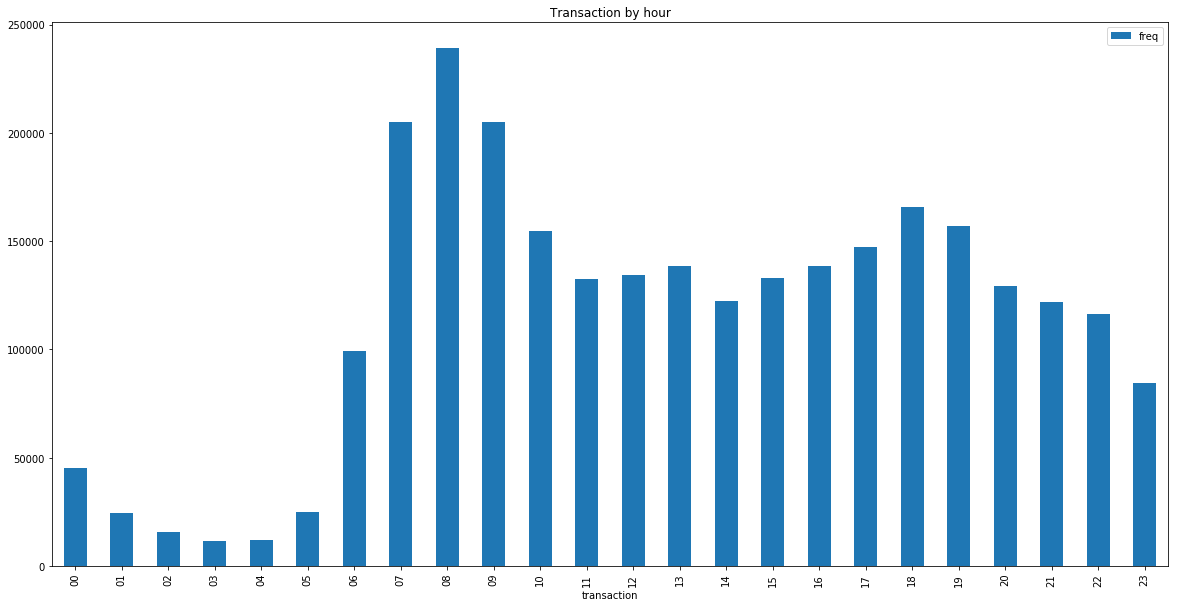

In [42]:
time_to_sales_plot = daily_df.plot(figsize=(20,10), kind='bar', title='Transaction by hour')
time_to_sales_plot.set_xlabel("time")
time_to_sales_plot.set_xlabel("transaction")
# Stakced category across different categoy

# Time to product category & amount

### Morning 7 - 10

In [52]:
morning_df = cleaned_df[cleaned_df['hour'].isin(['07', '08', '09', '10'])]['Cat'].value_counts().head(30)
morning_df

Newspaper           146513
Octopus              89304
Misc                 79731
Promotion Coupon     67035
Cigarette            46813
nan                  43893
Tea                  31892
Coffee               20373
Packaged Bakery      20062
Vendor Coupon        12976
Energy Drinks        12862
Candy                11851
STEAM STATION        11847
Soya Drink           11472
FBA Bun              11436
Mineral Water        10285
PREMIUM              10128
SAINT HONORE          9900
Distilled Water       8800
Magazine              8618
Bill Payment          8544
Hi Cal                7319
Sandwich              7104
Fresh Milk            6892
Gum                   5879
LOYALTYPROG COU       5822
Soya Milk             5573
UHT                   4681
Flavoured             4466
Juice Drinks          4405
Name: Cat, dtype: int64

### Morning 16 - 18

In [51]:
afternoon_df = cleaned_df[cleaned_df['hour'].isin(['16', '17', '18', '19'])]['Cat'].value_counts().head(20)
afternoon_df

Octopus              100196
Cigarette             52860
nan                   44053
Tea                   39618
KING CAN              18155
Packaged Bakery       15763
Energy Drinks         14189
Candy                 14176
Carbonated Drinks     13323
Misc                  13208
Novelty               12690
Newspaper             12593
Cone                  12565
Soya Drink            11329
Bill Payment          11230
STEAM STATION         11151
Chips                 10926
Chocolate             10599
Other Snacks           9561
Juice Drinks           9342
Name: Cat, dtype: int64

In [ ]:
pd.DataFrame(cleaned_df['Subcat'].value_counts())

## Spending

In [ ]:
pd.DataFrame(cleaned_df.groupby(['MOP', 'Amount\n']).size())

In [ ]:
cleaned_df['MOP'].value_counts()

In [ ]:
cleaned_df['Cat'].value_counts()

## Products

In [48]:
cleaned_df['Prod Name (Chi)'].value_counts().head(30)

$100八達通增值          177294
幸運星紙巾              137994
東方日報每份             126083
VIP 報紙 - $1.0       87879
$200八達通增值           62025
$50八達通增值            61778
蘋果日報                52800
$500八達通增值           33212
白金 萬寶路              27390
星島日報每份              22275
$300八達通增值           19372
硬盒 萬寶路              18403
SINGTAO $2 COU      14685
黑冰 8 萬寶路            14230
VIP 報紙-$0.5         13926
寶礦力 500毫升樽裝         12870
維他檸檬茶375毫升紙包裝       12696
津路烏龍茶500毫升樽庄        12442
親子王                 12036
薄荷白 萬寶路             11951
飛雪礦泉水 500毫升膠樽庄      11524
飛雪礦泉水 770毫升樽裝       11523
支付寶HK               11353
MX 萬寶路               8392
獅威大罐裝500毫升           8356
星島$2換領券              8179
OK感謝月$5電子現金券         8093
黑薄荷 萬寶路              7846
維他檸檬茶飲品500毫升膠樽裝      7777
屈臣氏蒸餾水 430毫升樽庄       7429
Name: Prod Name (Chi), dtype: int64

In [ ]:
cleaned_df[cleaned_df['Prod Name (Chi)'] == '維他奶250毫升紙包']

In [ ]:
cleaned_df['Cat'] = cleaned_df['Cat'].apply(lambda x: str(x).strip())
cleaned_df['Amount\n'] = cleaned_df['Amount\n'].apply(lambda x: x.replace('\n', ''))

In [ ]:
is_Octopus = cleaned_df['Cat'] == 'Octopus'
octopus_less_df = cleaned_df[~is_Octopus]

In [ ]:
spending_df = pd.DataFrame(octopus_less_df.groupby(['Amount\n', 'Cat']).size())

## Members Analysis

In [36]:
cleaned_df.count()

Store ID           2759843
Store Type         2759843
Trans ID           2759843
Date               2759843
Time               2759843
Member ID           479908
Member Grade        479873
Gender              464004
Member Birthday     418318
Prod Name (Chi)    2759843
Dept               2574127
Cat                2759843
Subcat             2573332
Sold Qty           2759843
MOP                2759843
Amount             2759843
hour               2759843
dtype: int64

In [37]:
418318/2759843

0.15157311484747502

In [11]:
is_member = cleaned_df['Member Birthday'].isnull()
member_df = cleaned_df[~is_member]

In [17]:
member_df['YOB'] = member_df['Member Birthday'].apply(lambda x: x.split('-')[0])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
member_df.sample(10)

,Store ID,Store Type,Trans ID,Date,Time,Member ID,Member Grade,Gender,Member Birthday,Prod Name (Chi),Dept,Cat,Subcat,Sold Qty,MOP,Amount,Amount,hour,YOB
596296,81982,HPU - PUBLIC HOUSING,8132922079,2018-04-13,19:31:29,63149308.0,S,F,2003-06-23,春日井玫瑰硬糖90克,Confectionery & Snack,Candy,Internation Soucing Japan,1,Octopus,6.9,6.9,19,2003
616045,81982,HPU - PUBLIC HOUSING,8132874459,2018-04-19,06:29:27,7276039.0,G,M,2003-08-28,IB/FBA優惠卷-$2,A & P Expense,Promotion Coupon,IB/FBA,1,Octopus,-2.0,-2.0,06,2003
1804636,72577,HSR - HIGH STREET RESIDENTIAL,7270360893,2018-04-20,16:29:39,54856336.0,S,M,2002-10-20,薄荷白 萬寶路,Tobacco,Cigarette,Menthol Lights KS,1,Octopus,57.0,57.0,16,2002
1073670,72371,HSR - HIGH STREET RESIDENTIAL,8140805640,2018-04-12,08:03:10,720699.0,G,F,1992-09-30,超軟三文治-日式白汁碎蛋火腿三文治,Food Service,Sandwich,SAINT HONORE,1,Octopus,14.0,14.0,08,1992
1852748,72572,HPR - PRIVATE HOUSING,7244186938,2018-04-02,16:32:08,9896637.0,G,M,2002-11-06,卡樂B燒烤味薯片105克包裝,Confectionery & Snack,Chips,Potato,1,Octopus,19.5,19.5,16,2002
728879,81781,HPU - PUBLIC HOUSING,7235378211,2018-04-26,21:46:04,27418810.0,G,M,2003-07-22,純萃喝重培曼特寧,Packaged Beverage,Coffee,Bottle,1,Octopus,13.0,13.0,21,2003
986610,81180,HPU - PUBLIC HOUSING,7224746036,2018-04-14,05:52:31,816535.0,S,M,2003-06-25,十字牌鮮奶 946毫升 盒庄,Dairy,Fresh Milk,946ML,1,Octopus,25.5,25.5,05,2003
2527344,54651,HSET -HS ENTERTAINMENT/TOURIST,7270480493,2018-04-20,12:34:07,9175545.0,S,F,2003-03-13,百福高鈣低糖鮮豆漿 236 毫升盒裝,Dairy,Soya Milk,236ML,1,Octopus,6.1,6.1,12,2003
1735056,72577,HSR - HIGH STREET RESIDENTIAL,7270633763,2018-04-02,11:58:15,63224957.0,G,M,2003-01-24,藍冰啤KING CAN 500毫升罐裝,Beer & Mixed Drinks,KING CAN,BIB,2,Octopus,19.0,19.0,11,2003
868785,81283,HPU - PUBLIC HOUSING,7279811985,2018-04-17,13:30:42,18413265.0,S,F,2003-05-13,十字牌芒果木瓜奶236毫升盒裝,Dairy,Flavoured,236ML,1,Octopus,5.8,5.8,13,2003


In [35]:
member_df.groupby(['YOB', 'Member Grade']).size()

YOB   Member Grade
1992  G                  464
      S                  238
1993  G                 2395
      S                  823
2002  G                57368
      S                46868
2003  G               171563
      S               138599
dtype: int64

In [14]:
member_df['Member Grade'].value_counts()

G    231790
S    186528
Name: Member Grade, dtype: int64

In [ ]:
age_df = pd.DataFrame(cleaned_df.groupby(['Member Birthday', 'Member ID']).size())

In [ ]:
cleaned_df['Gender'].value_counts()

In [ ]:
cleaned_df['Gender'] 